Welcome to JupyROOT 6.14/04
Extrapolation/vertices/station12/h_radialPos_vs_time
Extrapolation/vertices/station12/h_radialPos_vs_time
Extrapolation/vertices/station18/h_radialPos_vs_time
Extrapolation/vertices/station18/h_radialPos_vs_time


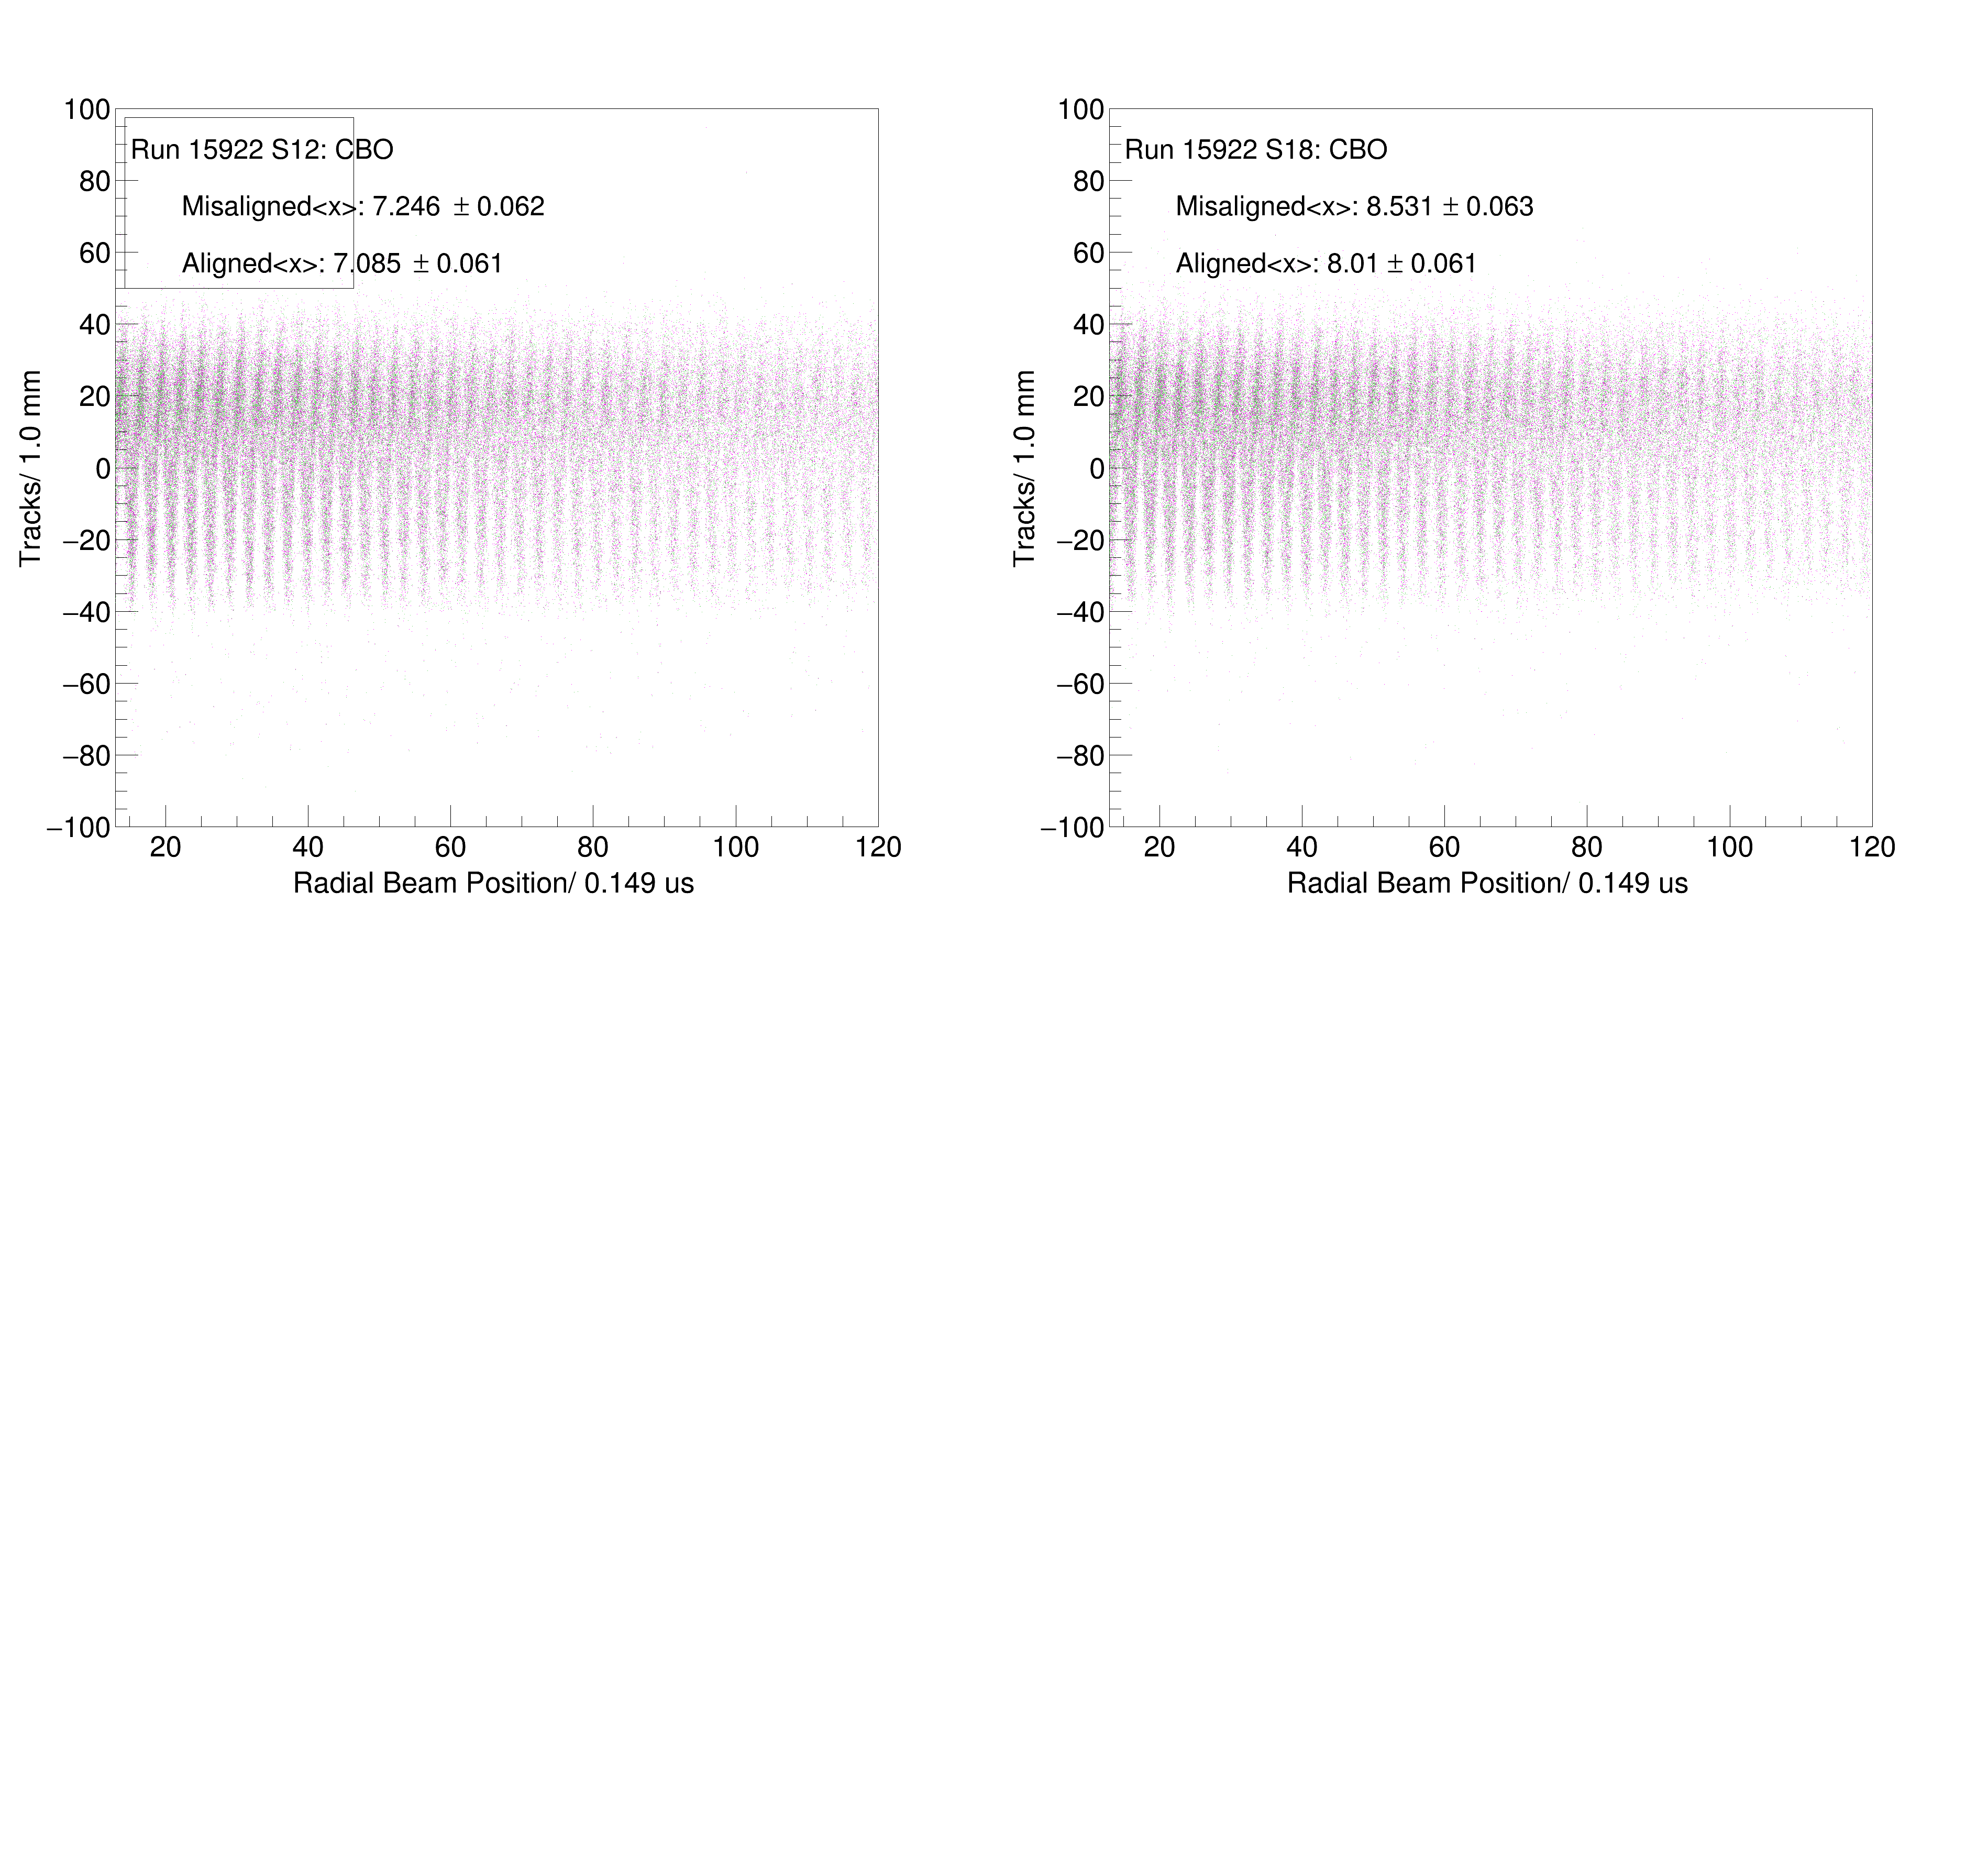

In [1]:
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")
from ROOT import TFile, TStyle, TCanvas, gStyle, TF1, gROOT
import matplotlib.pyplot as plt #for plotting 
import numpy as np  # smart arrays 
import itertools # smart lines 
import argparse, sys
from math import log10, floor
from matplotlib.ticker import MaxNLocator
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
import subprocess
def round_sig(x, sig=2):
	return round(x, sig-int(floor(log10(abs(x))))-1)

from ROOT import TH1F, TH2F, TF1, TCanvas, TFile, gStyle, TPaveText, TLegend
from decimal import *
round_to = 3
getcontext().prec = round_to

#Define constant paths and labels 
path =  "Extrapolation/vertices/station"
TfileName = "gm2tracker_ana.root"
stationName = ["12", "18"]
scr_nominal= "/Users/gleb/software/alignTrack/mpIIDESY/15922_Iter1/"
scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/15922_Iter3/"

#Containers to store histograms in orders as the names 
names = ["Misaligned", "Aligned"]
stateN=len(names)
colors = [6, 8] #purple, green 
styles = [3001, 3002]

plotName = ["h_radialPos_vs_time"]
plotXtitle = ["Radial Beam Position"]
plotTitle = ["CBO"]
plotMean = ["<x>"]
unitsY = ["mm"]
unitsX = ["us"]

meanArray=[] # for the final FoM shift-nominal 

#Make new canvas for plots 
c = TCanvas("", "", 3800, 3600)
c.Divide(2,2)
#Keep legend, histots and TFiles in scope 
legendArray=[]
histArray=[]
fileArray=[]

i_total=0 # canvas id counter 
for i_plot in range(0, len(plotName)):
    for i_station in range(0, len(stationName)):

        #Open TFiles
        scrFile_nominal = TFile.Open(scr_nominal+TfileName)
        scrFile_shift = TFile.Open(scr_shift+TfileName)
        fileName = [scrFile_nominal, scrFile_shift] # nominal (0) and global shift (1)  
        fileArray.append(fileName)

        c.cd(i_total+1)
        legend =  TLegend(0.11,0.70,0.35,0.89)
        legendArray.append(legend) # stroe all to keep in scope 
        for i_state in range(0, stateN):
           
            #Get the TH2F 
            print(path+stationName[i_station]+"/"+plotName[i_plot])
            plot = fileName[i_state].Get(str(path+stationName[i_station]+"/"+plotName[i_plot]))
            histArray.append(plot)
            
            #Apply a 30 -> 200 us time cut        
            plot.GetXaxis().SetRangeUser(13.0, 120.0) 
            #Apply a -50 -> + 50 mm position cut 
            plot.GetYaxis().SetRangeUser(-100.0, 100.0) 
            
            #Get position stats along the y-axis 
            mean=plot.GetMean(2)
            mean_error = plot.GetMeanError(2)
            sd=plot.GetRMS(2)
            sd_error=plot.GetRMSError(2)
            meanArray.append(mean)

            
            plot.SetLineColor(0)
            plot.SetFillStyle(1)
            plot.SetTitle("")
            plot.GetXaxis().CenterTitle()
            plot.GetXaxis().SetTitleOffset(1.1)
            binN_Y=plot.GetYaxis().GetBinWidth(1)
            binN_X=plot.GetXaxis().GetBinWidth(1)
            plot.GetYaxis().SetTitle("Tracks/ "+str(binN_Y)+" "+ unitsY[i_plot])
            plot.GetXaxis().SetTitle(plotXtitle[i_plot]+"/ "+str(round(binN_X,3))+" "+ unitsX[i_plot])            
            plot.GetYaxis().CenterTitle()
            plot.GetYaxis().SetTitleOffset(1.6)
            
            
            if (i_state == 0):
                plot.SetMarkerColor(colors[i_state])
                #plot.SetMarkerStyle(8)
                plot.Draw("")
                
            else:
                plot.SetMarkerColor(colors[i_state])
                plot.Draw("same")
            
            #fill legend once per state      
            legenValue1 = str(names[i_state])+plotMean[i_plot]+": "+str(round(mean, round_to))+" #pm "+str(round(mean_error,round_to))
            #legenValue2 = "#sigma: "+str(round(sd,round_to))+" #pm "+str(round(sd_error,round_to))
            legend.AddEntry(plot, str(legenValue1), "L")
        
        #draw legend once per canvas 
        #legend.SetHeader("#splitline{Run 15922}{S"+stationName[i_station]+": "+plotTitle[i_plot]+str(round(meanArray[1]-meanArray[0], round_to))+"}", "")
        legend.SetHeader("Run 15922 S"+stationName[i_station]+": "+plotTitle[i_plot], "")
        legend.Draw("same")
        i_total+=1
        meanArray=[]
        gStyle.SetOptStat(0) 
        gStyle.SetOptFit(0)
        gStyle.SetLegendBorderSize(0)
        gStyle.SetLegendTextSize(0.033)
        legend.SetFillStyle(0)

c.Draw()
c.Print("CBO_"+str(i_total)+".png")
